In [4]:
#Defensive stats for teams
import os
os.chdir(r"/Users/jordandass/Desktop/FPL/All stats")
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import requests
from bs4 import BeautifulSoup
import re
import json
import pandas as pd
from send2trash import send2trash
from itertools import combinations
from itertools import product
from collections import defaultdict
import unicodedata
from datetime import datetime 
from webdriver_manager.chrome import ChromeDriverManager
import concurrent.futures

def team_opponent(type):
    if type == 'def':
        PATH = "/Users/jordandass/Desktop/Drivers/chromedriver"

        driver = webdriver.Chrome(ChromeDriverManager().install())

        url = "https://fbref.com/en/comps/9/defense/Premier-League-Stats"

        driver.get(url)

        columns = ["Squad",	"Pl",	"90s",	"Tackles Tkl",	"Tackles TklW",	"Tackles Def 3rd",	"Tackles Mid 3rd",	"Tackles Att 3rd",	"Vs Dribbles Tkl",	"Vs Dribbles Att",	"Vs Dribbles Tkl%",	"Vs Dribbles Past",	"Pressures Press",	"Pressures Succ", "Pressures %",	"Pressures Def 3rd",	"Pressures Mid 3rd",	"Pressures Att 3rd",	"Blocks",	"Sh",	"ShSv",	"Pass",	"Int",	"Tkl+Int",	"Clr",	"Er"]

        array = []
        all_team_space ='|'.join(['Chelsea ', 'Tottenham ', 'Wolves ', 'Brentford ', 'Leeds United ', 'Leicester City ', 'Crystal Palace ', 'Liverpool ', 'Manchester City ', 'Everton ', 'Manchester Utd ', 'Norwich City ', 'Arsenal ', 'Burnley ', 'Brighton ', 'Aston Villa ', 'West Ham ', 'Newcastle Utd ', 'Watford ', 'Southampton '])
        for num in range(1, 21):
            try:
                team_dat = driver.find_element(By.XPATH, '//*[@id="stats_squads_defense_for"]/tbody/tr['+str(num)+']')
                team_dat = str(team_dat.text)
                team_name = re.findall(all_team_space, team_dat)[0]
                team_dat = re.sub(team_name, '', team_dat)
                list_team_dat = team_dat.split(' ')
                full_list_team_dat = [team_name.strip()] + list_team_dat
                array.append(full_list_team_dat)
            except:
                break

        pd.DataFrame(array, columns = columns).to_csv("Teams_def_data.csv")


        driver.find_element(By.XPATH, '//*[@id="all_stats_squads_defense"]/div[3]/div[2]/a').click()
        time.sleep(3)
        array = []
        all_team_space ='|'.join(['vs Chelsea ', 'vs Tottenham ', 'vs Wolves ', 'vs Brentford ', 'vs Leeds United ', 'vs Leicester City ', 'vs Crystal Palace ', 'vs Liverpool ', 'vs Manchester City ', 'vs Everton ', 'vs Manchester Utd ', 'vs Norwich City ', 'vs Arsenal ', 'vs Burnley ', 'vs Brighton ', 'vs Aston Villa ', 'vs West Ham ', 'vs Newcastle Utd ', 'vs Watford ', 'vs Southampton '])
        for num in range(1, 21):
            team_dat = driver.find_element(By.XPATH, '//*[@id="stats_squads_defense_against"]/tbody/tr['+str(num)+']')
            team_dat = str(team_dat.text)
            team_name = re.findall(all_team_space, team_dat)[0]
            team_dat = re.sub(team_name, '', team_dat)
            list_team_dat = team_dat.split(' ')
            full_list_team_dat = [team_name.strip()] + list_team_dat
            array.append(full_list_team_dat)

        pd.DataFrame(array, columns = columns).to_csv("Opponent_def_data_agaisnt_team.csv")

        driver.quit()


    elif type == 'pos':
        url = "https://fbref.com/en/comps/9/possession/Premier-League-Stats"

        driver = webdriver.Chrome(ChromeDriverManager().install())

        driver.get(url)

        columns = ["Squad","Pl","Poss","90s","Touches","Touches Def Pen","Touches Def 3rd","Touches Mid 3rd","Touches Att 3rd","Touches Att Pen","Touches Live","Dribbles Succ","Dribbles Att","Dribbles Succ%","Dribbles #Pl","Dribbles Megs","Carries","Carries TotDist","Carries	PrgDist","Carries Prog","Carries 1/3","Carries CPA","Carries Mis","Carries Dis","Receiving Targ","Receiving Rec","Receiving Rec%","Receiving Prog"]

        array = []
        all_team_space ='|'.join(['Chelsea ', 'Tottenham ', 'Wolves ', 'Brentford ', 'Leeds United ', 'Leicester City ', 'Crystal Palace ', 'Liverpool ', 'Manchester City ', 'Everton ', 'Manchester Utd ', 'Norwich City ', 'Arsenal ', 'Burnley ', 'Brighton ', 'Aston Villa ', 'West Ham ', 'Newcastle Utd ', 'Watford ', 'Southampton '])
        for num in range(1, 21):
            try:
                team_dat = driver.find_element(By.XPATH, '//*[@id="stats_squads_possession_for"]/tbody/tr['+str(num)+']')
                team_dat = str(team_dat.text)
                team_name = re.findall(all_team_space, team_dat)[0]
                team_dat = re.sub(team_name, '', team_dat)
                list_team_dat = team_dat.split(' ')
                full_list_team_dat = [team_name.strip()] + list_team_dat
                array.append(full_list_team_dat)
            except:
                break

        pd.DataFrame(array, columns = columns).to_csv("Teams_poss_data.csv")


        driver.find_element(By.XPATH, '//*[@id="all_stats_squads_possession"]/div[3]/div[2]/a').click()
        time.sleep(2)
        array = []
        all_team_space ='|'.join(['vs Chelsea ', 'vs Tottenham ', 'vs Wolves ', 'vs Brentford ', 'vs Leeds United ', 'vs Leicester City ', 'vs Crystal Palace ', 'vs Liverpool ', 'vs Manchester City ', 'vs Everton ', 'vs Manchester Utd ', 'vs Norwich City ', 'vs Arsenal ', 'vs Burnley ', 'vs Brighton ', 'vs Aston Villa ', 'vs West Ham ', 'vs Newcastle Utd ', 'vs Watford ', 'vs Southampton '])
        for num in range(1, 21):
            team_dat = driver.find_element(By.XPATH, '//*[@id="stats_squads_possession_against"]/tbody/tr['+str(num)+']')
            team_dat = str(team_dat.text)
            team_name = re.findall(all_team_space, team_dat)[0]
            team_dat = re.sub(team_name, '', team_dat)
            list_team_dat = team_dat.split(' ')
            full_list_team_dat = [team_name.strip()] + list_team_dat
            array.append(full_list_team_dat)

        pd.DataFrame(array, columns = columns).to_csv("Opponent_poss_data_agaisnt_team.csv")

        driver.quit()

    elif type == 'shot':
        driver = webdriver.Chrome(ChromeDriverManager().install())

        url = "https://fbref.com/en/comps/9/shooting/Premier-League-Stats"

        driver.get(url)

        columns = ["Squad","# Pl","90s","Gls","Sh","SoT","SoT%","Sh/90","SoT/90","G/Sh","G/SoT","Dist","FK","PK","PKatt","xG","npxG","npxG/Sh","G-xG","np:G-xG"]


        array = []
        all_team_space ='|'.join(['Chelsea ', 'Tottenham ', 'Wolves ', 'Brentford ', 'Leeds United ', 'Leicester City ', 'Crystal Palace ', 'Liverpool ', 'Manchester City ', 'Everton ', 'Manchester Utd ', 'Norwich City ', 'Arsenal ', 'Burnley ', 'Brighton ', 'Aston Villa ', 'West Ham ', 'Newcastle Utd ', 'Watford ', 'Southampton '])
        for num in range(1, 21):
            team_dat = driver.find_element(By.XPATH, '/html/body/div[2]/div[6]/div[2]/div[4]/div[1]/table/tbody/tr['+str(num)+']')
            team_dat = str(team_dat.text)
            team_name = re.findall(all_team_space, team_dat)[0]
            team_dat = re.sub(team_name, '', team_dat)
            list_team_dat = team_dat.split(' ')
            full_list_team_dat = [team_name.strip()] + list_team_dat
            array.append(full_list_team_dat)

        pd.DataFrame(array, columns = columns).to_csv("Teams_shot_data.csv")


        driver.find_element(By.XPATH, '//*[@id="all_stats_squads_shooting"]/div[3]/div[2]/a').click()
        time.sleep(2)

        array = []
        all_team_space ='|'.join(['vs Chelsea ', 'vs Tottenham ', 'vs Wolves ', 'vs Brentford ', 'vs Leeds United ', 'vs Leicester City ', 'vs Crystal Palace ', 'vs Liverpool ', 'vs Manchester City ', 'vs Everton ', 'vs Manchester Utd ', 'vs Norwich City ', 'vs Arsenal ', 'vs Burnley ', 'vs Brighton ', 'vs Aston Villa ', 'vs West Ham ', 'vs Newcastle Utd ', 'vs Watford ', 'vs Southampton '])
        for num in range(1, 21):
            team_dat = driver.find_element(By.XPATH, '//*[@id="stats_squads_shooting_against"]/tbody/tr['+str(num)+']')
            team_dat = str(team_dat.text)
            team_name = re.findall(all_team_space, team_dat)[0]
            team_dat = re.sub(team_name, '', team_dat)
            list_team_dat = team_dat.split(' ')
            full_list_team_dat = [team_name.strip()] + list_team_dat
            array.append(full_list_team_dat)

        pd.DataFrame(array, columns = columns).to_csv("Opponent_shot_data_agaisnt_team.csv")

        driver.quit()

    elif type == 'gca':
        driver = webdriver.Chrome(ChromeDriverManager().install())

        url = "https://fbref.com/en/comps/9/gca/Premier-League-Stats"

        driver.get(url)

        columns = ["Squad","# Pl","90s","SCA", "SCA 90", "SCA PassLive", "SCA PassDead", "SCA Drib", "SCA Sh", "SCA Fld", "SCA Def", "GCA", "GCA 90", "GCA PassLive", "GCA PassDead", "GCA Drib", "GCA Sh", "GCA Fld", "GCA Def"]

        array = []
        all_team_space ='|'.join(['Chelsea ', 'Tottenham ', 'Wolves ', 'Brentford ', 'Leeds United ', 'Leicester City ', 'Crystal Palace ', 'Liverpool ', 'Manchester City ', 'Everton ', 'Manchester Utd ', 'Norwich City ', 'Arsenal ', 'Burnley ', 'Brighton ', 'Aston Villa ', 'West Ham ', 'Newcastle Utd ', 'Watford ', 'Southampton '])
        for num in range(1, 21):
            team_dat = driver.find_element(By.XPATH, '//*[@id="stats_squads_gca_for"]/tbody/tr['+str(num)+']')
            team_dat = str(team_dat.text)
            team_name = re.findall(all_team_space, team_dat)[0]
            team_dat = re.sub(team_name, '', team_dat)
            list_team_dat = team_dat.split(' ')
            full_list_team_dat = [team_name.strip()] + list_team_dat
            array.append(full_list_team_dat)

        pd.DataFrame(array, columns = columns).to_csv("Teams_gca_data.csv")


        driver.find_element(By.XPATH, '//*[@id="all_stats_squads_gca"]/div[3]/div[2]/a').click()
        time.sleep(2)

        array = []
        all_team_space ='|'.join(['vs Chelsea ', 'vs Tottenham ', 'vs Wolves ', 'vs Brentford ', 'vs Leeds United ', 'vs Leicester City ', 'vs Crystal Palace ', 'vs Liverpool ', 'vs Manchester City ', 'vs Everton ', 'vs Manchester Utd ', 'vs Norwich City ', 'vs Arsenal ', 'vs Burnley ', 'vs Brighton ', 'vs Aston Villa ', 'vs West Ham ', 'vs Newcastle Utd ', 'vs Watford ', 'vs Southampton '])
        for num in range(1, 21):
            team_dat = driver.find_element(By.XPATH, '//*[@id="stats_squads_gca_against"]/tbody/tr['+str(num)+']')
            team_dat = str(team_dat.text)
            team_name = re.findall(all_team_space, team_dat)[0]
            team_dat = re.sub(team_name, '', team_dat)
            list_team_dat = team_dat.split(' ')
            full_list_team_dat = [team_name.strip()] + list_team_dat
            array.append(full_list_team_dat)

        pd.DataFrame(array, columns = columns).to_csv("Opponent_gca_data_agaisnt_team.csv")

        driver.quit()

    elif type == 'pass':
        driver = webdriver.Chrome(ChromeDriverManager().install())

        url = "https://fbref.com/en/comps/9/passing/Premier-League-Stats"

        driver.get(url)

        columns = ['Squad', 'Pl', '90s', 'Total Cmp', 'Total Att', 'Total Cmp%', 'Total TotDist', 'Total PrgDist', 'Short Cmp', 'Short Att', 'Short Cmp%', 'Med Cmp', 'Med Att', 'Med Cmp%', 'Long Cmp', 'Long Att', 'Long Cmp%', 'Ast', 'xA', 'A-xA', 'KP', '1/3', 'PPA', 'CrsPA', 'Prog']

        array = []
        all_team_space ='|'.join(['Chelsea ', 'Tottenham ', 'Wolves ', 'Brentford ', 'Leeds United ', 'Leicester City ', 'Crystal Palace ', 'Liverpool ', 'Manchester City ', 'Everton ', 'Manchester Utd ', 'Norwich City ', 'Arsenal ', 'Burnley ', 'Brighton ', 'Aston Villa ', 'West Ham ', 'Newcastle Utd ', 'Watford ', 'Southampton '])
        for num in range(1, 21):
            try:
                team_dat = driver.find_element(By.XPATH, '//*[@id="stats_squads_passing_for"]/tbody/tr['+str(num)+']')
                team_dat = str(team_dat.text)
                team_name = re.findall(all_team_space, team_dat)[0]
                team_dat = re.sub(team_name, '', team_dat)
                list_team_dat = team_dat.split(' ')
                full_list_team_dat = [team_name.strip()] + list_team_dat
                array.append(full_list_team_dat)
            except:
                break

        pd.DataFrame(array, columns = columns).to_csv("Teams_pass_data.csv")


        driver.find_element(By.XPATH, '//*[@id="all_stats_squads_passing"]/div[3]/div[2]/a').click()
        time.sleep(2)
        array = []
        all_team_space ='|'.join(['vs Chelsea ', 'vs Tottenham ', 'vs Wolves ', 'vs Brentford ', 'vs Leeds United ', 'vs Leicester City ', 'vs Crystal Palace ', 'vs Liverpool ', 'vs Manchester City ', 'vs Everton ', 'vs Manchester Utd ', 'vs Norwich City ', 'vs Arsenal ', 'vs Burnley ', 'vs Brighton ', 'vs Aston Villa ', 'vs West Ham ', 'vs Newcastle Utd ', 'vs Watford ', 'vs Southampton '])
        for num in range(1, 21):
            team_dat = driver.find_element(By.XPATH, '//*[@id="stats_squads_passing_against"]/tbody/tr['+str(num)+']')
            team_dat = str(team_dat.text)
            team_name = re.findall(all_team_space, team_dat)[0]
            team_dat = re.sub(team_name, '', team_dat)
            list_team_dat = team_dat.split(' ')
            full_list_team_dat = [team_name.strip()] + list_team_dat
            array.append(full_list_team_dat)

        pd.DataFrame(array, columns = columns).to_csv("Opponent_pass_data_agaisnt_team.csv")

        driver.quit()

with concurrent.futures.ThreadPoolExecutor() as executor:
    secs = ['def', 'shot', 'pass', 'gca', 'pos']
    executor.map(team_opponent, secs)

[WDM] - 

[WDM] - 

[WDM] - 

[WDM] - 

[WDM] - ====== WebDriver manager ======
[WDM] - 

[WDM] - ====== WebDriver manager ======
[WDM] - ====== WebDriver manager ======
[WDM] - ====== WebDriver manager ======
[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 103.0.5060
[WDM] - Current google-chrome version is 103.0.5060
[WDM] - Current google-chrome version is 103.0.5060
[WDM] - Get LATEST driver version for 103.0.5060
[WDM] - Get LATEST driver version for 103.0.5060
[WDM] - Get LATEST driver version for 103.0.5060
[WDM] - Current google-chrome version is 103.0.5060
[WDM] - Get LATEST driver version for 103.0.5060
[WDM] - Current google-chrome version is 103.0.5060
[WDM] - Get LATEST driver version for 103.0.5060
[WDM] - Get LATEST driver version for 103.0.5060
[WDM] - Get LATEST driver version for 103.0.5060
[WDM] - Get LATEST driver version for 103.0.5060
[WDM] - Get LATEST driver version for 103.0.5060
[WDM] - Get LATEST driver version for 103.0.5060


In [5]:
#Defensive stats for players

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import requests
from bs4 import BeautifulSoup
import re
import json
import pandas as pd
from send2trash import send2trash
from itertools import combinations
from itertools import product
from collections import defaultdict
import unicodedata
from datetime import datetime 
import numpy as np
from webdriver_manager.chrome import ChromeDriverManager

def player_dat_all(type):
    driver = webdriver.Chrome(ChromeDriverManager().install())
    if type == 'def':
        url = "https://fbref.com/en/comps/9/defense/Premier-League-Stats"

        driver.get(url)

        columns = ["Player","Nation","Pos","Squad","Age","Born","90s",	"Tackles Tkl",	"Tackles TklW",	"Tackles Def 3rd",	"Tackles Mid 3rd",	"Tackles Att 3rd",	"Vs Dribbles Tkl",	"Vs Dribbles Att",	"Vs Dribbles Tkl%",	"Vs Dribbles Past",	"Pressures Press",	"Pressures Succ%",	"Pressures Def 3rd",	"Pressures Mid 3rd",	"Pressures Att 3rd",	"Blocks",	"Sh",	"ShSv",	"Pass",	"Int",	"Tkl+Int",	"Clr",	"Er"]
        array = []
        all_team_space ='|'.join(['Chelsea ', 'Tottenham ', 'Wolves ', 'Brentford ', 'Leeds United ', 'Leicester City ', 'Crystal Palace ', 'Liverpool ', 'Manchester City ', 'Everton ', 'Manchester Utd ', 'Norwich City ', 'Arsenal ', 'Burnley ', 'Brighton ', 'Aston Villa ', 'West Ham ', 'Newcastle Utd ', 'Watford ', 'Southampton '])
        positions = '[GKDFMW,]{2,}'
        for num in range(1, 455):
            try:
                lists = []
                for td_num, col_name in zip(range(1, 31), columns):
                    player_dat = driver.find_element(By.XPATH, '//*[@id="stats_defense"]/tbody/tr['+str(num)+']/td['+str(td_num)+']')
                    dat = str(player_dat.text)
                    if dat == '':
                        dat = np.nan
                    if col_name == 'Nation':
                        dat = re.findall('[A-Z]+', dat)[0]
                    lists.append(dat)
                array.append(lists)
            except:
                continue

        pd.DataFrame(array, columns = columns).to_csv("Player_defense.csv")
        driver.quit()
    
    elif type == 'pos':
        url = "https://fbref.com/en/comps/9/possession/Premier-League-Stats"

        driver.get(url)


        columns = ["Player","Nation","Pos","Squad","Age","Born","90s","Touches","Touches Def Pen","Touches Def 3rd","Touches Mid 3rd","Touches Att 3rd","Touches Att Pen","Touches Live","Dribbles Succ","Dribbles Att","Dribbles Succ%","Dribbles #Pl","Dribbles Megs","Carries","Carries TotDist","Carries PrgDist","Carries Prog","Carries 1/3","Carries	CPA","Carries Mis","Carries Dis","Receiving	Targ","Receiving Rec","Receiving Rec%","Receiving Prog"]
        array = []
        all_team_space ='|'.join(['Chelsea ', 'Tottenham ', 'Wolves ', 'Brentford ', 'Leeds United ', 'Leicester City ', 'Crystal Palace ', 'Liverpool ', 'Manchester City ', 'Everton ', 'Manchester Utd ', 'Norwich City ', 'Arsenal ', 'Burnley ', 'Brighton ', 'Aston Villa ', 'West Ham ', 'Newcastle Utd ', 'Watford ', 'Southampton '])
        positions = '[GKDFMW,]{2,}'
        for num in range(1, 455):
            try:
                lists = []
                for td_num, col_name in zip(range(1, 32), columns):
                    player_dat = driver.find_element(By.XPATH, '//*[@id="stats_possession"]/tbody/tr['+str(num)+']/td['+str(td_num)+']')
                    dat = str(player_dat.text)
                    if dat == '':
                        dat = np.nan
                    if col_name == 'Nation':
                        dat = re.findall('[A-Z]+', dat)[0]
                    lists.append(dat)
                array.append(lists)
            except:
                continue

        pd.DataFrame(array, columns = columns).to_csv("Player_possession.csv")
        driver.quit()

    elif type == 'shot':
        url = "https://fbref.com/en/comps/9/shooting/Premier-League-Stats"

        driver.get(url)


        columns = ["Player","Nation","Pos","Squad","Age","Born","90s","Gls","Sh","SoT","SoT%","Sh/90","SoT/90","G/Sh","G/SoT","Dist","FK","PK","PKatt","xG","npxG","npxG/Sh","G-xG","np:G-xG"]
        array = []
        all_team_space ='|'.join(['Chelsea ', 'Tottenham ', 'Wolves ', 'Brentford ', 'Leeds United ', 'Leicester City ', 'Crystal Palace ', 'Liverpool ', 'Manchester City ', 'Everton ', 'Manchester Utd ', 'Norwich City ', 'Arsenal ', 'Burnley ', 'Brighton ', 'Aston Villa ', 'West Ham ', 'Newcastle Utd ', 'Watford ', 'Southampton '])
        positions = '[GKDFMW,]{2,}'
        for num in range(1, 455):
            try:
                lists = []
                for td_num, col_name in zip(range(1, 25), columns):
                    player_dat = driver.find_element(By.XPATH, '//*[@id="stats_shooting"]/tbody/tr['+str(num)+']/td['+str(td_num)+']')
                    dat = str(player_dat.text)
                    if dat == '':
                        dat = np.nan
                    lists.append(dat)
                array.append(lists)
            except:
                continue

        pd.DataFrame(array, columns = columns).to_csv("Player_shot.csv")
        driver.quit()

    elif type == 'pass':
        url = "https://fbref.com/en/comps/9/passing/Premier-League-Stats"

        driver.get(url)


        columns = ["Player","Nation","Pos","Squad","Age","Born","90s",'Total Cmp', 'Total Att', 'Total Cmp%', 'Total TotDist', 'Total PrgDist', 'Short Cmp', 'Short Att', 'Short Cmp%', 'Med Cmp', 'Med Att', 'Med Cmp%', 'Long Cmp', 'Long Att', 'Long Cmp%', 'Ast', 'xA', 'A-xA', 'KP', '1/3', 'PPA', 'CrsPA', 'Prog']
        array = []
        all_team_space ='|'.join(['Chelsea ', 'Tottenham ', 'Wolves ', 'Brentford ', 'Leeds United ', 'Leicester City ', 'Crystal Palace ', 'Liverpool ', 'Manchester City ', 'Everton ', 'Manchester Utd ', 'Norwich City ', 'Arsenal ', 'Burnley ', 'Brighton ', 'Aston Villa ', 'West Ham ', 'Newcastle Utd ', 'Watford ', 'Southampton '])
        positions = '[GKDFMW,]{2,}'
        for num in range(1, 455):
            try:
                lists = []
                for td_num, col_name in zip(range(1, 30), columns):
                    player_dat = driver.find_element(By.XPATH, '//*[@id="stats_passing"]/tbody/tr['+str(num)+']/td['+str(td_num)+']')
                    dat = str(player_dat.text)
                    if dat == '':
                        dat = np.nan
                    lists.append(dat)
                array.append(lists)
            except:
                continue

        pd.DataFrame(array, columns = columns).to_csv("Player_pass.csv")
        driver.quit()
        

with concurrent.futures.ThreadPoolExecutor() as executor:
	secs = ['def', 'shot', 'pass', 'pos']
	executor.map(player_dat_all, secs)



[WDM] - 

[WDM] - 

[WDM] - 

[WDM] - 

[WDM] - ====== WebDriver manager ======
[WDM] - ====== WebDriver manager ======
[WDM] - ====== WebDriver manager ======
[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 103.0.5060
[WDM] - Current google-chrome version is 103.0.5060
[WDM] - Get LATEST driver version for 103.0.5060
[WDM] - Get LATEST driver version for 103.0.5060
[WDM] - Current google-chrome version is 103.0.5060
[WDM] - Get LATEST driver version for 103.0.5060
[WDM] - Current google-chrome version is 103.0.5060
[WDM] - Get LATEST driver version for 103.0.5060
[WDM] - Driver [/Users/jordandass/.wdm/drivers/chromedriver/mac64/103.0.5060.53/chromedriver] found in cache
/var/folders/16/t083_7x94m532lfsy9y_0dfw0000gn/T/ipykernel_4525/1690249611.py:24: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())
[WDM] - Driver [/Users/jordandass/.wdm/drivers/chromedr

In [7]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import requests
from bs4 import BeautifulSoup
import re
import json
import pandas as pd
from send2trash import send2trash
from itertools import combinations
from itertools import product
from collections import defaultdict
import unicodedata
from datetime import datetime 
import hvplot.pandas

def fpl_data():
    from selenium import webdriver
    from webdriver_manager.chrome import ChromeDriverManager

    driver = webdriver.Chrome(ChromeDriverManager().install())

    driver.get("https://0e0c55ie39.execute-api.eu-central-1.amazonaws.com/default/fplAnalytics-DownloadPlayerStatusData")

    time.sleep(10)

    df = pd.read_csv (r'/Users/jordandass/Downloads/fplAnalytics-playerStautsData.csv')

    send2trash(r'/Users/jordandass/Downloads/fplAnalytics-playerStautsData.csv')

    driver.quit()
    
    df.to_csv('fpl_points.csv')
    return df
def injury_data():
    from selenium.webdriver.common.keys import Keys
    from selenium import webdriver
    from webdriver_manager.chrome import ChromeDriverManager

    driver = webdriver.Chrome(ChromeDriverManager().install())

    driver.get("https://www.fplanalytics.com/InjuryWatch.html")

    columns = ['name', 'team', 'position', 'status', 'playing chance %', 'ownership %', 'news']
    array = []
    final_page = int(driver.find_element(By.XPATH, '//*[@id="data-table_paginate"]/ul/li[8]/a').text)
    print(final_page)
    for num in range(final_page):
        try:
            for row in range(1, 11):
                lists = []
                for col in range(1, 8):
                    data = driver.find_element(By.XPATH, f'//*[@id="data-table"]/tbody/tr[{row}]/td[{col}]')
                    data_txt = data.text
                    lists.append(data_txt)
                array.append(lists)
        except:
            break
    
        html = driver.find_element(By.TAG_NAME, 'html')
        html.send_keys(Keys.END)
        time.sleep(1)
        try:
            driver.find_element(By.XPATH, '//*[@id="data-table_next"]/a').click()
        except:
            break
        
    driver.quit()
    df = pd.DataFrame(array, columns = columns).set_index('name')
    df.to_csv('injury.csv')
    return df
    
points_df = fpl_data()
#points_df.hvplot.scatter(x = 'cost', y = 'total_points', hover_cols = ['name', 'position'], by = 'team')



[WDM] - 

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 103.0.5060
[WDM] - Get LATEST driver version for 103.0.5060
[WDM] - Driver [/Users/jordandass/.wdm/drivers/chromedriver/mac64/103.0.5060.53/chromedriver] found in cache
/var/folders/16/t083_7x94m532lfsy9y_0dfw0000gn/T/ipykernel_4525/2829702026.py:24: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [2]:
from holoviews import opts

opts.defaults(
    opts.Scatter(
        width=800, height=800, 
        active_tools=['box_zoom'],
))
points_df[points_df['status'] != 'NotAvail'].hvplot.scatter(x = 'cost', y = 'points_per_game', hover_cols = ['name', 'position'], by = 'team')


:NdOverlay   [team]
   :Scatter   [cost]   (points_per_game,name,position)

In [7]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import requests
from bs4 import BeautifulSoup
import re
import json
import pandas as pd
from send2trash import send2trash
from itertools import combinations
from itertools import product
from collections import defaultdict
import unicodedata
from datetime import datetime 

PATH = "/Users/jordandass/Desktop/Drivers/chromedriver"

from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())

driver.get("https://0e0c55ie39.execute-api.eu-central-1.amazonaws.com/default/fplAnalytics-DownloadPlayerStatusData")

time.sleep(10)

df = pd.read_csv (r'/Users/jordandass/Downloads/fplAnalytics-playerStautsData.csv')

send2trash(r'/Users/jordandass/Downloads/fplAnalytics-playerStautsData.csv')

name_list = []
cost_list = []
total_points_list = []
position_list = []
ppg_list = []
team_list = []
points_cost_list = []
clean_name_list = []

time_now = re.findall('[0-9]{4}-[0-9]+-[0-9]+', str(datetime.now()))[0]

def strip_accents(s):
       return ''.join(c for c in unicodedata.normalize('NFD', s)
                  if unicodedata.category(c) != 'Mn')

for num in range(len(df)):
    if int(df.iloc[num, 6]) != 0:
        if str(df.iloc[num, 4]) != 'NotAvail':
            name_list.append(df.iloc[num, 0])
            cost_list.append(df.iloc[num, 3])
            total_points_list.append(df.iloc[num, 6])
            position_list.append(df.iloc[num, 2])
            ppg_list.append(df.iloc[num, 8])
            team_list.append(df.iloc[num, 1])
            points_cost_list.append(format(float(df.iloc[num, 6])/float(df.iloc[num, 3]),'.2f'))
            clean_name_list.append(strip_accents(str(df.iloc[num, 0]).lower()))
            
            
prices_df = pd.read_csv('prices.csv')
cost_list_ = []
for player in list(prices_df['Players']):
    cost_list_.append(list(df[df["name"] == player]["cost"])[0])
if list(prices_df.iloc[:,-1]) != cost_list_ or time_now in list(prices_df.columns):
    prices_df[time_now] = cost_list_
    prices_df.to_csv('prices.csv', index = False)


fpl_players = pd.DataFrame({'Players':name_list, 'Costs':cost_list, 'Total points':total_points_list, 'Positions':position_list, 'PPG':ppg_list, 'Team':team_list, 'Points per mil':points_cost_list, 'Clean name':clean_name_list})

fpl_players.to_csv('fpl_players.csv')
cost_effective = fpl_players.sort_values(by = 'Points per mil', ascending = False)
cost_effective.to_csv('cost_effective.csv')

gk_df = []
def_df = []
mid_df = []
fwd_df = []

for position in ['GKP','DEF','MID','FWD']:
    for num in range(len(fpl_players)):
        if fpl_players.iloc[num, 3] == position:
            if position == 'GKP':
                gk_df.append(list(fpl_players.iloc[num,]))
            elif position == 'DEF':
                def_df.append(list(fpl_players.iloc[num,]))
            elif position == 'MID':
                mid_df.append(list(fpl_players.iloc[num,]))
            elif position == 'FWD':
                fwd_df.append(list(fpl_players.iloc[num,]))
                

gk_df = pd.DataFrame(columns = ['Players', 'Costs', 'Total points', 'Positions', 'PPG','Team', 'Points per mil', 'Clean name'], data = gk_df).sort_values(by = ['Costs', 'PPG'], ascending = [True, False])
def_df = pd.DataFrame(columns = ['Players', 'Costs', 'Total points', 'Positions', 'PPG','Team', 'Points per mil', 'Clean name'], data = def_df).sort_values(by = ['Costs', 'PPG'], ascending = [True, False])
mid_df = pd.DataFrame(columns = ['Players', 'Costs', 'Total points', 'Positions', 'PPG','Team', 'Points per mil', 'Clean name'], data = mid_df).sort_values(by = ['Costs', 'PPG'], ascending = [True, False])
fwd_df = pd.DataFrame(columns = ['Players', 'Costs', 'Total points', 'Positions', 'PPG','Team', 'Points per mil', 'Clean name'], data = fwd_df).sort_values(by = ['Costs', 'PPG'], ascending = [True, False])

best_df = pd.concat([gk_df, def_df, mid_df, fwd_df]).sort_values(by = 'Points per mil', ascending = False)
best_df.to_csv("best.csv")


gk_prices = sorted(list(set(list(gk_df.iloc[:,1]))))

def_prices = sorted(list(set(list(def_df.iloc[:,1]))))
    
mid_prices = sorted(list(set(list(mid_df.iloc[:,1]))))

fwd_prices = sorted(list(set(list(fwd_df.iloc[:,1]))))

all_price_quantity = {}
gk_price_quantity = {}
def_price_quantity = {}
mid_price_quantity = {}
fwd_price_quantity = {}


for price_list in [gk_prices, def_prices, mid_prices, fwd_prices]:
    for price in price_list:
        if price_list == gk_prices:
            gk_price_quantity[price] = len(gk_df[gk_df['Costs'] == price])
        elif price_list == def_prices:
            def_price_quantity[price] = len(def_df[def_df['Costs'] == price])
        elif price_list == mid_prices:
            mid_price_quantity[price] = len(mid_df[mid_df['Costs'] == price])
        elif price_list == fwd_prices:
            fwd_price_quantity[price] = len(fwd_df[fwd_df['Costs'] == price])    
            
    all_price_quantity['gk'] = gk_price_quantity
    all_price_quantity['def'] = def_price_quantity
    all_price_quantity['mid'] = mid_price_quantity
    all_price_quantity['fwd'] = fwd_price_quantity
driver.quit()



====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [/Users/jordandass/.wdm/drivers/chromedriver/mac64/98.0.4758.102/chromedriver] found in cache
/var/folders/16/t083_7x94m532lfsy9y_0dfw0000gn/T/ipykernel_3781/3428515018.py:24: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [23]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import requests
from bs4 import BeautifulSoup
import re
import json
import pandas as pd
from send2trash import send2trash
from itertools import combinations
from itertools import product
from collections import defaultdict
import unicodedata
from datetime import datetime 
import numpy as np
from webdriver_manager.chrome import ChromeDriverManager
import panel as pn

pn.extension("plotly")

import hvplot.pandas 
import holoviews as hv
def graphs():
    goal_scorer = pd.read_csv('goal_scorer.csv')
    team_shot = pd.read_csv('Teams_shot_data.csv')
    games = max(list(team_shot.iloc[:, 2]))

    # Player shot chart
    scatter_plot = goal_scorer.hvplot.scatter(x = 'Gls', y = 'xG', hover_cols=['Player', '90s'], color = 'Squad', xlabel = 'Goals per Player', ylabel = 'Total xG', title = f'Players goal stats across {games} games', width = 800, height = 400)
    player_shot_chart = scatter_plot * hv.Slope.from_scatter(scatter_plot).opts(color = "black")
    dash1 = pn.Column(player_shot_chart)

    # Team shot conversion rates
    scatter_plot = team_shot.hvplot.scatter(x = 'G/SoT', y = 'SoT/90', color = 'Squad', hover_cols = ['Squad', '# Pl'], width = 800, height = 400) 
    team_conversion = scatter_plot * hv.Slope.from_scatter(scatter_plot).opts(color = "black")

    # sustainability of shots, mainly through average distances of shots
    scatter_plot = team_shot.hvplot.scatter(x = 'Sh', y = 'Dist', color = 'Squad', hover_cols = ['Squad', '# Pl'], width = 800, height = 400) 
    team_shot_sustainability = scatter_plot * hv.Slope.from_scatter(scatter_plot).opts(color = "black")


    # sustainability of xG by distance
    scatter_plot = team_shot.hvplot.scatter(x = 'np:G-xG', y = 'SoT/90', color = 'Squad', hover_cols = ['Squad', '# Pl'], title = "Unlucky (Underperforming xG) vs Lucky (Outperforming xG)", width = 800, height = 400) 
    team_xG_sustainability = scatter_plot * hv.Slope.from_scatter(scatter_plot).opts(color = "black") * hv.VLine(0)


    dashboard = pn.Tabs(("Players' shot chart", player_shot_chart), ("Teams' conversion ability", team_conversion),
            ("Teams' shot quality (dist)", team_shot_sustainability),
            ("Teams' non-penalty goals sustainability", team_xG_sustainability))
    
    return dashboard

def update_fixtures_fix():
    df = pd.read_csv('fixtures_raw.csv')
    time_now = datetime.utcnow()

    index_number = -1
    nan = df.iloc[-1, 7]
    for num in sorted(range(0, len(df)), reverse = True):
        game_time = df.iloc[num, 3]
        score = df.iloc[num, 7]
        if type(score) == str:
            break
        index_number -= 1

    next_game_time = pd.to_datetime(df.iloc[index_number + 1, 3])

    update = time_now > next_game_time
    
    if update == True:
        PATH = "/Users/jordandass/Desktop/Drivers/chromedriver"

        driver = webdriver.Chrome(ChromeDriverManager().install())

        driver.get("https://fixturedownload.com/download/epl-2021-GMTStandardTime.csv")

        time.sleep(5)

        df = pd.read_csv (r'/Users/jordandass/Downloads/epl-2021-GMTStandardTime.csv')

        send2trash(r'/Users/jordandass/Downloads/epl-2021-GMTStandardTime.csv')

        driver.quit()
        
        return df
        
    else:
        return df
    
df = update_fixtures_fix()

def two_team_avg(team1, team2, defe = 'Pressures %', gca = "GCA 90", passi = 'Total Cmp%', poss = "Poss", shot = 'SoT/90', mean = True):
    import hvplot.pandas
    team_data_list = ["Teams_def_data.csv", "Teams_gca_data.csv", "Teams_pass_data.csv", "Teams_poss_data.csv", "Teams_shot_data.csv"]
    opponent_data_list = ["Opponent_def_data_agaisnt_team.csv", "Opponent_gca_data_agaisnt_team.csv", "Opponent_pass_data_agaisnt_team.csv", "Opponent_poss_data_agaisnt_team.csv", "Opponent_shot_data_agaisnt_team.csv"]
    cat_list = [defe, gca, passi, poss, shot]
    
    team1_data_list_avg, team2_data_list_avg = [], []
    team1_data_list_rank, team2_data_list_rank = [], []
    
    for team_data, opponent_data, cat in zip(team_data_list, opponent_data_list, cat_list):
        team_df = pd.read_csv(team_data)
        
        if mean == True:
            mean = round(team_df[cat].mean(), 2)
        else:
            mean = round(team_df[cat].median(), 2)
    
        # Attaining diff avg
        team1_stat = team_df[team_df['Squad'] == team1][cat].values[0]
        team2_stat = team_df[team_df['Squad'] == team2][cat].values[0]

        team1_avg_diff = team1_stat - mean
        team2_avg_diff = team2_stat - mean

        team1_data_list_avg.append(team1_avg_diff)
        team2_data_list_avg.append(team2_avg_diff)
        
        # Attaining ranking
        team1_rank = sorted(list(team_df[cat]), reverse = True).index(team1_stat)
        team2_rank = sorted(list(team_df[cat]), reverse = True).index(team2_stat)
        
        team1_data_list_rank.append(team1_rank)
        team2_data_list_rank.append(team2_rank)
    
    rank_df = pd.DataFrame({'Categories (20 Teams)': cat_list, f"{team1} rank": team1_data_list_rank, f"{team2} rank": team2_data_list_rank}).set_index('Categories (20 Teams)')
    avg_diff_df = pd.DataFrame({'Categories': cat_list, team1: team1_data_list_avg, team2: team2_data_list_avg}).set_index('Categories')
    avg_diff_plot = avg_diff_df.hvplot.bar(title = f'Difference of {team1} and {team2} from average')

    return rank_df, avg_diff_plot
    
def two_team_analysis(team1, team2, defe = 'Pressures %', gca = "GCA 90", passi = 'Total Cmp%', poss = "Poss", shot = 'SoT/90'):
    import hvplot.pandas
    team_data_list = ["Teams_def_data.csv", "Teams_gca_data.csv", "Teams_pass_data.csv", "Teams_poss_data.csv", "Teams_shot_data.csv"]
    opponent_data_list = ["Opponent_def_data_agaisnt_team.csv", "Opponent_gca_data_agaisnt_team.csv", "Opponent_pass_data_agaisnt_team.csv", "Opponent_poss_data_agaisnt_team.csv", "Opponent_shot_data_agaisnt_team.csv"]
    cat_list = [defe, gca, passi, poss, shot]
    
    team1_data_list_avg, team2_data_list_avg = [], []
    
    team1_array, team2_array = [], []
    for team_data, opponent_data, cat in zip(team_data_list, opponent_data_list, cat_list):
        team_df = pd.read_csv(team_data)
        oppo_df = pd.read_csv(opponent_data)
        
        for both_team in [team1, team2]:
            team1_stat = team_df[team_df['Squad'] == both_team][cat].values[0]

            agaisnt_team2_stat = oppo_df[oppo_df['Squad'] == f"vs {list(set([team1, team2]) - set([both_team]))[0]}"][cat].values[0]

            diff_stat = team1_stat - agaisnt_team2_stat

            if diff_stat > 0:
                change_stat = 'Higher'
            elif diff_stat == 0:
                change_stat = 'Same'
            elif diff_stat < 0:
                change_stat = 'Lower'
            
            if both_team == team1:
                team1_array.append([cat, team1_stat, agaisnt_team2_stat, diff_stat, change_stat])
            else:
                team2_array.append([cat, team1_stat, agaisnt_team2_stat, diff_stat, change_stat])
        
    team1_df = pd.DataFrame(team1_array, columns = ['Categories', f'{team1} normally', f'vs {team2}', 'difference', 'change']).set_index('Categories')
    team2_df = pd.DataFrame(team2_array, columns = ['Categories', f'{team2} normally', f'vs {team1}', 'difference', 'change']).set_index('Categories') 
    
    return team1_df, team2_df
    
def goal_stats(team1, team2):
    goal_table = []
    goal_hist = []
    goal_df = pd.read_csv('Player_shot.csv')[['90s', 'Player', 'Squad', 'Gls', 'np:G-xG', 'xG']]
    for team in [team1, team2]:
        goal_scorer = goal_df[(goal_df["Squad"] == team) & (goal_df["Gls"] > 0)].drop(columns = ['Squad']).sort_values(by = ['Gls', 'xG'], ascending = False).set_index('Player')
        goal_table.append(goal_scorer.head())
        plot = goal_scorer[['Gls']].hvplot.bar(rot = 90, shared_axes = False)
        goal_hist.append(plot)
    
    return goal_table, goal_hist

def squad(team1, team2):
    squad_table, squad_hist = [], []
    goal_df = pd.read_csv('Player_shot.csv')[['90s', 'Player', 'Squad']]
    
    for team in [team1, team2]:
        goal_scorer = goal_df[(goal_df["Squad"] == team)].drop(columns = ['Squad']).sort_values(by = ['90s'], ascending = False)
        
        squad_table.append(goal_scorer.head())
        plot = goal_scorer.hvplot.bar(rot = 90, shared_axes = False)
        squad_hist.append(plot)
        
    return squad_table, squad_hist

def injury_status(team1, team2):
    injury_df = pd.read_csv('injury.csv')
    
    teams_dict = {'Chelsea':'CHE' , 'Tottenham':'TOT', 'Wolves':'WOL', 'Brentford':'BRE', 'Leeds United':'LEE', 'Leicester City':'LEI', 'Crystal Palace':'CRY', 'Liverpool':'LIV', 'Manchester City':'MCI', 'Everton':'EVE', 'Manchester Utd':'MUN', 'Norwich City':'NOR', 'Arsenal':'ARS', 'Burnley':'BUR', 'Brighton':'BHA', 'Aston Villa':'AVL', 'West Ham':'WHU', 'Newcastle Utd':'NEW', 'Watford':'WAT', 'Southampton':'SOU'}
    team_acro1 = teams_dict[team1]
    team_acro2 = teams_dict[team2]
    
    team1_inj_list = injury_df[injury_df['team'] == team_acro1]
    team2_inj_list = injury_df[injury_df['team'] == team_acro2]
    
    team1_inj_list = pn.widgets.DataFrame(team1_inj_list, autosize_mode='none', widths={'name': 70, 'team': 70, 'position':70, 'status':70, 'playing chance %':70, 'ownership %':70, 'news':500})
    team2_inj_list = pn.widgets.DataFrame(team2_inj_list, autosize_mode='none', widths={'name': 70, 'team': 70, 'position':70, 'status':70, 'playing chance %':70, 'ownership %':70, 'news':500})
    return team1_inj_list, team2_inj_list
    

def all_together_now(team1, team2, defe = 'Pressures %', gca = "GCA 90", passi = 'Total Cmp%', poss = "Poss", shot = 'SoT/90'):
    # [,]
    array1 = two_team_analysis(team1, team2, defe, gca, passi, poss, shot)
    
    # [,]
    array2 = two_team_avg(team1, team2, defe, gca, passi, poss, shot)
    
    # [[,], [,]]
    array3 = goal_stats(team1, team2)
    
    # [[,], [,]]
    array4 = squad(team1, team2)
    
    # [[,], [,]]
    array5 = injury_status(team1, team2)
    
    page1 = pn.Row(array1[0], array1[1])
    page2 = pn.Column(array2[0], array2[1])
    page3 = pn.Column(pn.Row(array3[0][0], array3[1][0]), pn.Row(array3[0][1], array3[1][1]))
    page4 = pn.Column(pn.Row(array4[0][0], array4[1][0]), pn.Row(array4[0][1], array4[1][1]))
    page5 = pn.Column(array5[0], array5[1])
    dashboard = pn.Tabs(("Difference average from vs average", page1), ("Difference from average", page2), ("Goal scorers", page3), ("Players 90s", page4), ("Team Injuries/Exits", page5))
    return dashboard
    
print(pd.read_csv('Teams_def_data.csv')['Squad'])
display(all_together_now('Arsenal', 'Chelsea'))
graphs()

0             Arsenal
1         Aston Villa
2           Brentford
3            Brighton
4             Burnley
5             Chelsea
6      Crystal Palace
7             Everton
8        Leeds United
9      Leicester City
10          Liverpool
11    Manchester City
12     Manchester Utd
13      Newcastle Utd
14       Norwich City
15        Southampton
16          Tottenham
17            Watford
18           West Ham
19             Wolves
Name: Squad, dtype: object


Tabs
    [0] Row
        [0] DataFrame(DataFrame)
        [1] DataFrame(DataFrame)
    [1] Column
        [0] DataFrame(DataFrame)
        [1] HoloViews(Bars)
    [2] Column
        [0] Row
            [0] DataFrame(DataFrame)
            [1] HoloViews(Bars)
        [1] Row
            [0] DataFrame(DataFrame)
            [1] HoloViews(Bars)
    [3] Column
        [0] Row
            [0] DataFrame(DataFrame)
            [1] HoloViews(Bars)
        [1] Row
            [0] DataFrame(DataFrame)
            [1] HoloViews(Bars)
    [4] Column
        [0] DataFrame(autosize_mode='none', value=              ..., widths={'name': 70, 'team': 70, ...})
        [1] DataFrame(autosize_mode='none', value=            name t..., widths={'name': 70, 'team': 70, ...})

Tabs
    [0] HoloViews(Overlay, name="Players' shot chart")
    [1] HoloViews(Overlay, name="Teams' conversion a...)
    [2] HoloViews(Overlay, name="Teams' shot q...)
    [3] HoloViews(Overlay, name="Teams' non-penalty g...)

,Factors,Arsenal,Wolves
0,Poss,9,12
1,Touches Att Pen,7,17
2,xG,8,17
3,G/Sh,9,16
4,G-xG,7,15
5,Pressures %,10,8
6,Sh,13,16


,Factors,Arsenal normally,Teams agaisnt Wolves,Higher/Lower,% change
0,Poss,51.0,51.90,Higher,0.017647
1,Touches Att Pen,593.0,583.00,Lower,-0.016863
2,xG,32.8,30.50,Lower,-0.070122
3,G/Sh,0.1,0.05,Lower,-0.500000
4,G-xG,1.2,-13.50,Lower,-12.250000
5,Pressures %,29.9,30.20,Higher,0.010033
6,Sh,94.0,68.00,Lower,-0.276596


,Factors,Wolves normally,Teams agaisnt Arsenal,Higher/Lower,% change
0,Poss,48.10,49.00,Higher,0.018711
1,Touches Att Pen,453.00,524.00,Higher,0.156733
2,xG,23.20,29.70,Higher,0.280172
3,G/Sh,0.08,0.08,Lower,0.000000
4,G-xG,-3.20,-4.70,Lower,0.468750
5,Pressures %,30.10,27.70,Lower,-0.079734
6,Sh,87.00,95.00,Higher,0.091954




====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [/Users/jordandass/.wdm/drivers/chromedriver/mac64/98.0.4758.102/chromedriver] found in cache
/var/folders/16/t083_7x94m532lfsy9y_0dfw0000gn/T/ipykernel_3781/1776097604.py:26: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


IndexError: index 7 is out of bounds for axis 0 with size 7

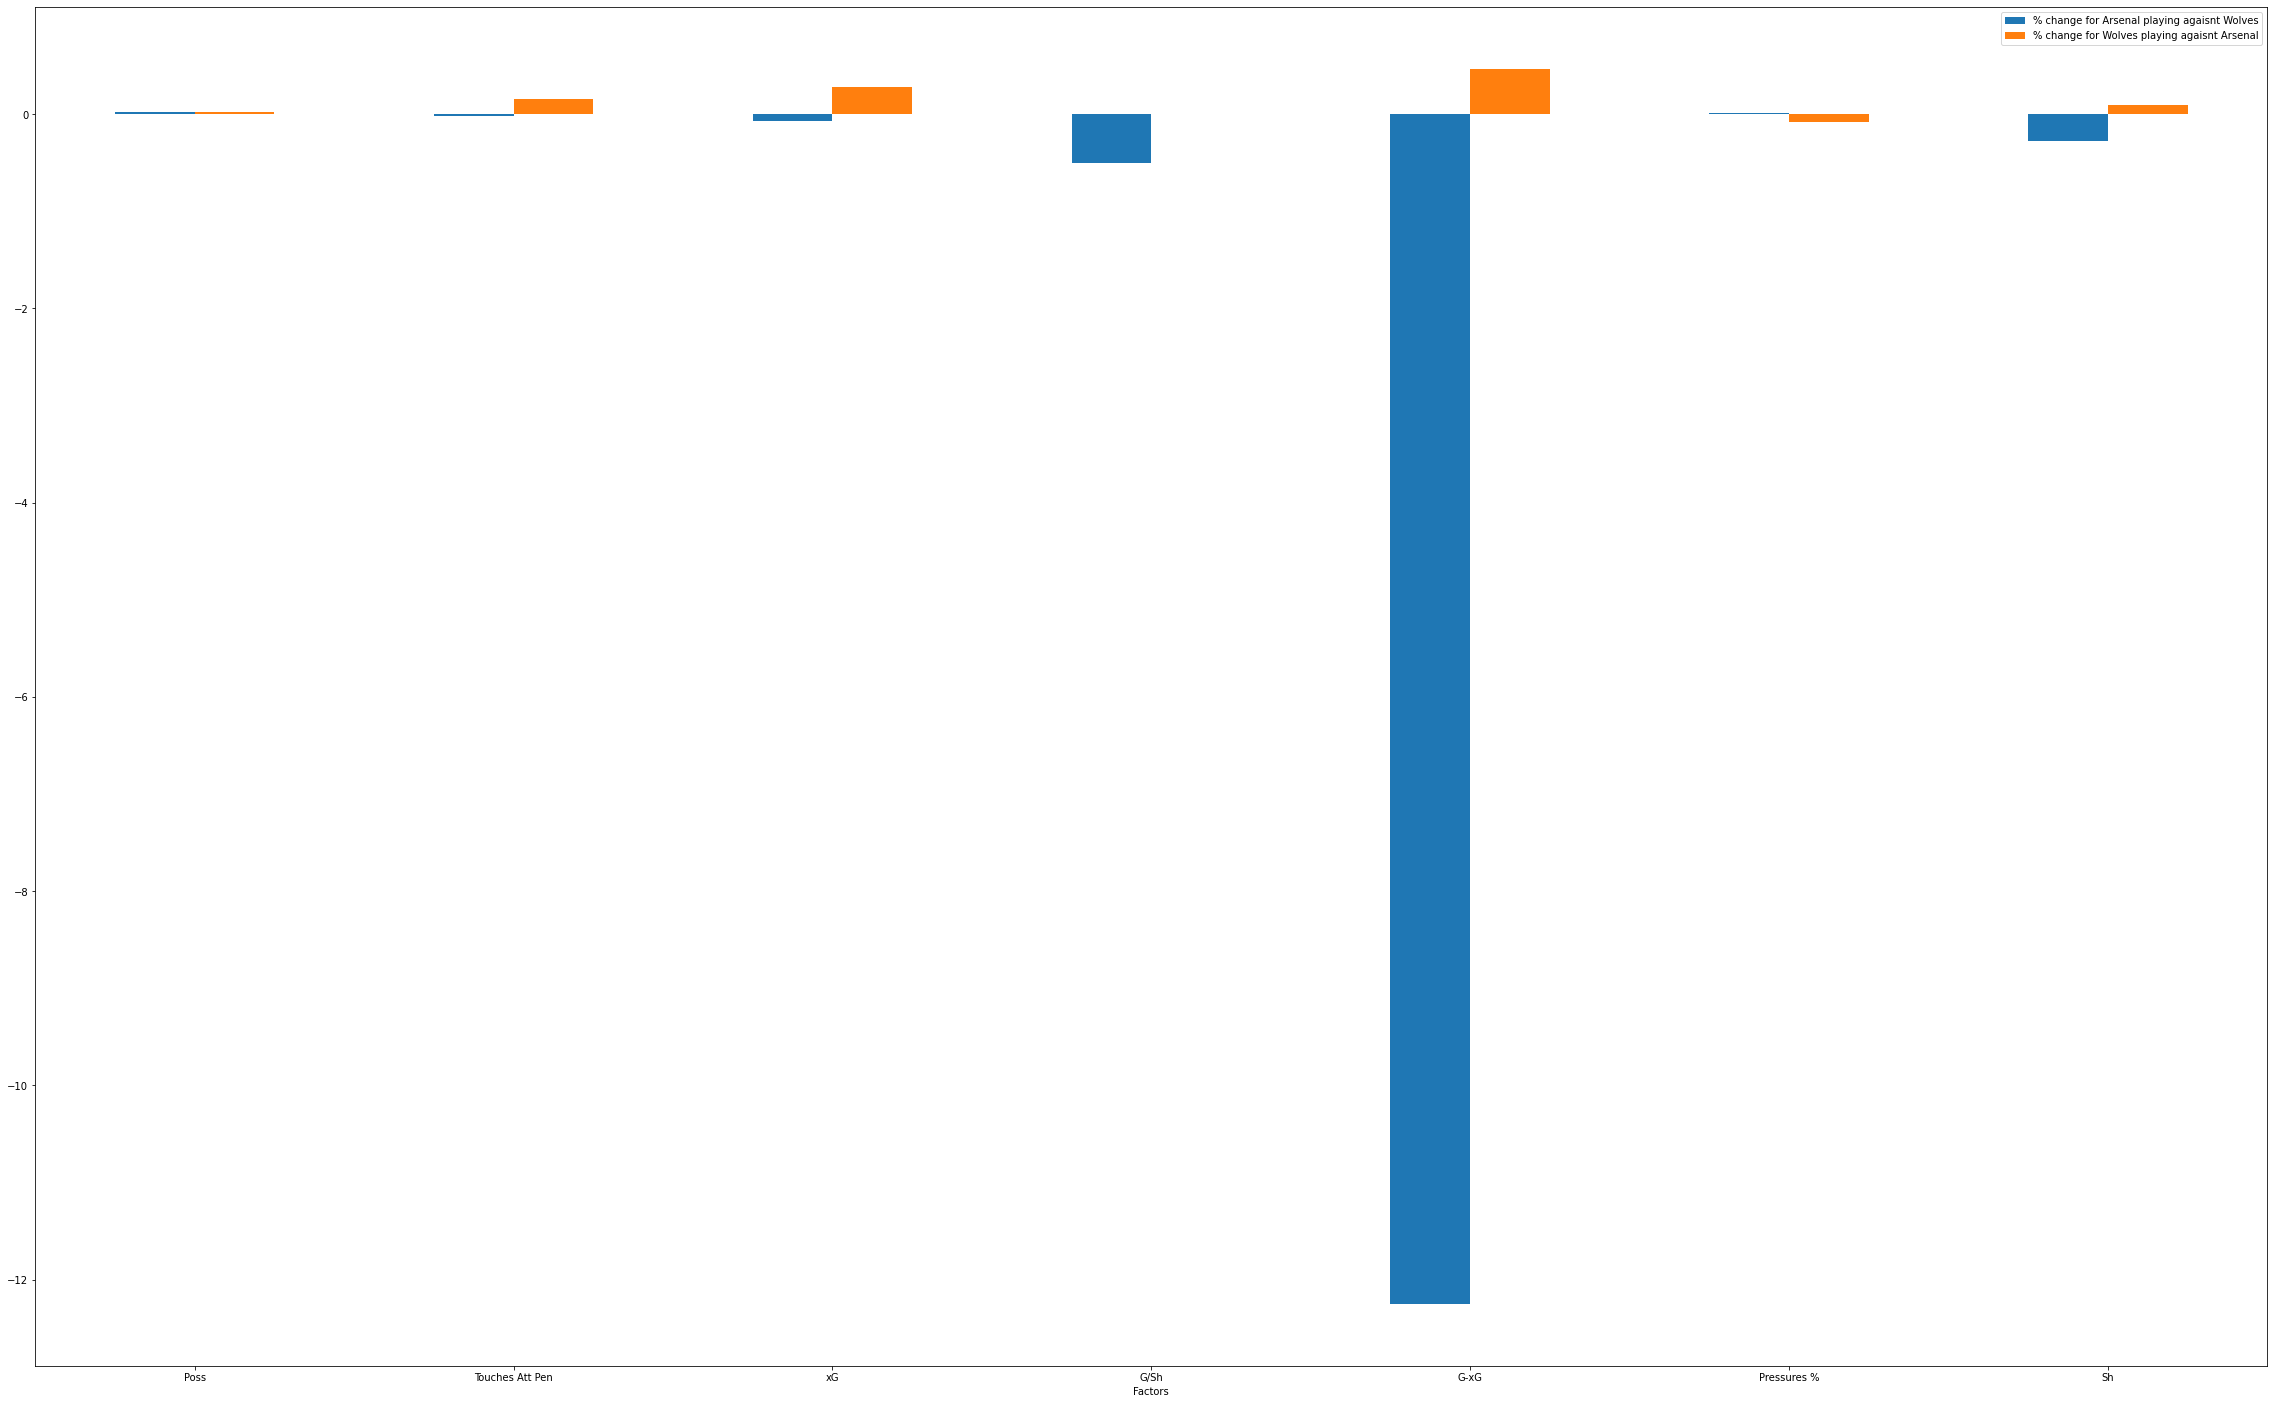

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import re
from webdriver_manager.chrome import ChromeDriverManager
from collections import defaultdict
from datetime import datetime, timedelta
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from send2trash import send2trash
from webdriver_manager.chrome import ChromeDriverManager
import pytz




# Get newest fixtures
def update_fixtures_fix(team1, team2, update):
    if update == True:
        PATH = "/Users/jordandass/Desktop/Drivers/chromedriver"

        driver = webdriver.Chrome(ChromeDriverManager().install())

        driver.get("https://fixturedownload.com/download/epl-2021-GMTStandardTime.csv")

        time.sleep(5)

        df = pd.read_csv (r'/Users/jordandass/Downloads/epl-2021-GMTStandardTime.csv')

        send2trash(r'/Users/jordandass/Downloads/epl-2021-GMTStandardTime.csv')

        driver.quit()

        fixture = df
        df.to_csv("fixtures_raw.csv")
        round_number_list = []
        for team in [team1, team2]:
            team_dat = df[((df['Home Team'] == team1)|(df["Away Team"] == team1))]
            for num in range(len(team_dat)):
                if type(team_dat.iloc[num, 7]) == str:
                    round_number = team_dat.iloc[num, 2]
            round_number_list.append(round_number)
        return round_number_list
    else:
        df = pd.read_csv("fixtures_raw.csv")
        round_number_list = []
        for team in [team1, team2]:
            team_dat = df[((df['Home Team'] == team1)|(df["Away Team"] == team1))]
            for num in range(len(team_dat)):
                if type(team_dat.iloc[num, 7]) == str:
                    round_number = team_dat.iloc[num, 2]
            round_number_list.append(round_number)
        return round_number_list
    
def update_when_necessary_fix(team1, team2):
    os.chdir(r"/Users/jordandass/Desktop/FPL/All stats")
    array_not_played = []
    time = pd.read_csv("fixtures_raw.csv")
    for num in range(len(time)):
        if type(time.iloc[num, 7]) == float:
            os.chdir(r"/Users/jordandass/Desktop/FPL/All stats")
            if pd.to_datetime(time.iloc[num, 3]) < pd.to_datetime(datetime.utcnow().strftime("%Y-%m-%d %H:%M:%S")):
                return update_fixtures_fix(team1, team2, update = True)
            else:
                return update_fixtures_fix(team1, team2, update = False)
            break

def two_team_analysis(team1, team2):
    rank_list_1, rank_list_2 = [], []
    team1_normally, team1_agaisnt, team2_normally, team2_agaisnt = [], [], [], []
    team1_normally_str = team1 + ' normally'
    team1_agaisnt_str = 'Teams agaisnt ' + team2
    vs_team1 = 'vs '+team1

    team2_normally_str = team2 + ' normally'
    team2_agaisnt_str = 'Teams agaisnt ' + team1
    vs_team2 = 'vs '+team2

    poss_important_factors = ['Poss', 'Touches Att Pen']
    os.chdir(r"/Users/jordandass/Desktop/FPL/All stats")
    poss_df = pd.read_csv("Teams_poss_data.csv")
    opp_poss_df = pd.read_csv("Opponent_poss_data_agaisnt_team.csv")
    for factor in poss_important_factors:
        sorted_poss_df = poss_df.sort_values(by = [factor], ascending = [False])
        rank = 0
        for team in sorted_poss_df["Squad"]:
            rank += 1
            if team == team1:
                rank_list_1.append(rank)
            elif team == team2:
                rank_list_2.append(rank)
        team1_normally.append(poss_df[poss_df["Squad"] == team1][factor].values[0])
        team1_agaisnt.append(opp_poss_df[opp_poss_df["Squad"] == vs_team2][factor].values[0])
        team2_normally.append(poss_df[poss_df["Squad"] == team2][factor].values[0])
        team2_agaisnt.append(opp_poss_df[opp_poss_df["Squad"] == vs_team1][factor].values[0])

    shoot_important_factors = ['xG', 'G/Sh', 'G-xG']
    os.chdir(r"/Users/jordandass/Desktop/FPL/All stats")
    shoot_df = pd.read_csv("Teams_shot_data.csv")
    opp_shoot_df = pd.read_csv("Opponent_shot_data_agaisnt_team.csv")
    for factor in shoot_important_factors:
        sorted_shoot_df = shoot_df.sort_values(by = [factor], ascending = [False])
        rank = 0
        for team in sorted_shoot_df["Squad"]:
            rank += 1
            if team == team1:
                rank_list_1.append(rank)
            elif team == team2:
                rank_list_2.append(rank)
        team1_normally.append(shoot_df[shoot_df["Squad"] == team1][factor].values[0])
        team1_agaisnt.append(opp_shoot_df[opp_shoot_df["Squad"] == vs_team2][factor].values[0])
        team2_normally.append(shoot_df[shoot_df["Squad"] == team2][factor].values[0])
        team2_agaisnt.append(opp_shoot_df[opp_shoot_df["Squad"] == vs_team1][factor].values[0])

    def_important_factors = ['Pressures %', 'Sh']
    os.chdir(r"/Users/jordandass/Desktop/FPL/All stats")
    def_df = pd.read_csv("Teams_def_data.csv")
    opp_def_df = pd.read_csv("Opponent_def_data_agaisnt_team.csv")
    for factor in def_important_factors:
        sorted_def_df = def_df.sort_values(by = [factor], ascending = [False])
        rank = 0
        for team in sorted_def_df["Squad"]:
            rank += 1
            if team == team1:
                rank_list_1.append(rank)
            elif team == team2:
                rank_list_2.append(rank)
        team1_normally.append(def_df[def_df["Squad"] == team1][factor].values[0])
        team1_agaisnt.append(opp_def_df[opp_def_df["Squad"] == vs_team2][factor].values[0])
        team2_normally.append(def_df[def_df["Squad"] == team2][factor].values[0])
        team2_agaisnt.append(opp_def_df[opp_def_df["Squad"] == vs_team1][factor].values[0])

    columns = poss_important_factors + shoot_important_factors + def_important_factors
    display(pd.DataFrame({'Factors':columns , team1: rank_list_1, team2:rank_list_2}))

    team1_df = pd.DataFrame({'Factors':columns, team1_normally_str: team1_normally, team1_agaisnt_str: team1_agaisnt})
    check_list = []
    percent_list1 = []
    for factor in team1_df['Factors']:
        percent_list1.append((team1_df[team1_df["Factors"] == factor][team1_agaisnt_str].values[0] - team1_df[team1_df["Factors"] == factor][team1_normally_str].values[0])/team1_df[team1_df["Factors"] == factor][team1_normally_str].values[0])
        if team1_df[team1_df["Factors"] == factor][team1_normally_str].values[0] < team1_df[team1_df["Factors"] == factor][team1_agaisnt_str].values[0]:
            check_list.append('Higher')
        else:
            check_list.append('Lower')

    team1_df["Higher/Lower"] = check_list
    team1_df["% change"] = percent_list1
    display(team1_df)


    team2_df = pd.DataFrame({'Factors':columns, team2_normally_str: team2_normally, team2_agaisnt_str: team2_agaisnt})
    check_list = []
    percent_list2 = []
    for factor in team2_df['Factors']:
        percent_list2.append((team2_df[team2_df["Factors"] == factor][team2_agaisnt_str].values[0] - team2_df[team2_df["Factors"] == factor][team2_normally_str].values[0])/team2_df[team2_df["Factors"] == factor][team2_normally_str].values[0])
        if team2_df[team1_df["Factors"] == factor][team2_normally_str].values[0] < team2_df[team2_df["Factors"] == factor][team2_agaisnt_str].values[0]:
            check_list.append('Higher')
        else:
            check_list.append('Lower')
    team2_df["Higher/Lower"] = check_list
    team2_df["% change"] = percent_list2
    display(team2_df)

    percent_change_team1_str = '% change for ' + team1 + ' playing agaisnt ' + team2
    percent_change_team2_str = '% change for ' + team2 + ' playing agaisnt ' + team1
    combined_percent_df = pd.DataFrame({'Factors':columns, percent_change_team1_str:percent_list1, percent_change_team2_str:percent_list2})

    barplot1 = combined_percent_df.set_index("Factors").plot.bar(rot=0, figsize=(40, 25))

    positions = ['GK', 'DF', 'MF', 'FW']
    formations = [1, 5, 5, 4]
    os.chdir(r"/Users/jordandass/Desktop/FPL/All stats")
    shoot_df = pd.read_csv("Player_shot.csv")
    round_number = update_when_necessary_fix(team1, team2)
    number = 0
    for team in [team1, team2]:
        full_team = shoot_df[shoot_df["Squad"] == team]
        for pos, num in zip(positions, formations):
            filter_pos = full_team.Pos.str.contains(pos)
            played_players = full_team[filter_pos].sort_values(by = '90s', ascending = False).head(num)
            often_selected_players = played_players[played_players["90s"] > (round_number[number] - 3)]
            print(pos)
            display(often_selected_players)
        number += 1
            
two_team_analysis('Arsenal', 'Wolves') 

In [8]:
# Cleaning shot data, removing single goal outlier npxg/Sh

import pandas as pd

player_shot = pd.read_csv('Player_shot.csv')
goal_scorers = player_shot[player_shot['Gls']]
goal_scorers.to_csv('goal_scorer.csv')

In [142]:
import plotly.express as px
import panel as pn
import pandas as pd
import os
from pathlib import Path
from dotenv import load_dotenv

pn.extension("plotly")

import hvplot.pandas 
import holoviews as hv

goal_scorer = pd.read_csv('goal_scorer.csv')
team_shot = pd.read_csv('Teams_shot_data.csv')
games = max(list(team_shot.iloc[:, 2]))

# Player shot chart
scatter_plot = goal_scorer.hvplot.scatter(x = 'Gls', y = 'xG', hover_cols=['Player', '90s'], color = 'Squad', xlabel = 'Goals per Player', ylabel = 'Total xG', title = f'Players goal stats across {games} games', width = 800, height = 400)
player_shot_chart = scatter_plot * hv.Slope.from_scatter(scatter_plot).opts(color = "black")
dash1 = pn.Column(player_shot_chart)

# Team shot conversion rates
scatter_plot = team_shot.hvplot.scatter(x = 'G/SoT', y = 'SoT/90', color = 'Squad', hover_cols = ['Squad', '# Pl'], width = 800, height = 400) 
team_conversion = scatter_plot * hv.Slope.from_scatter(scatter_plot).opts(color = "black")

# sustainability of shots, mainly through average distances of shots
scatter_plot = team_shot.hvplot.scatter(x = 'Sh', y = 'Dist', color = 'Squad', hover_cols = ['Squad', '# Pl'], width = 800, height = 400) 
team_shot_sustainability = scatter_plot * hv.Slope.from_scatter(scatter_plot).opts(color = "black")


# sustainability of xG by distance
scatter_plot = team_shot.hvplot.scatter(x = 'np:G-xG', y = 'SoT/90', color = 'Squad', hover_cols = ['Squad', '# Pl'], title = "Unlucky (Underperforming xG) vs Lucky (Outperforming xG)", width = 800, height = 400) 
team_xG_sustainability = scatter_plot * hv.Slope.from_scatter(scatter_plot).opts(color = "black") * hv.VLine(0)


pn.Tabs(("Players' shot chart", player_shot_chart), ("Teams' conversion ability", team_conversion),
        ("Teams' shot quality (dist)", team_shot_sustainability),
        ("Teams' non-penalty goals sustainability", team_xG_sustainability))


Tabs
    [0] HoloViews(Overlay, name="Players' shot chart")
    [1] HoloViews(Overlay, name="Teams' conversion a...)
    [2] HoloViews(Overlay, name="Teams' shot q...)
    [3] HoloViews(Overlay, name="Teams' non-penalty g...)